# Clinic 4 - Dimensionality Reduction (Bootcamp)

### Learning goals

After this clinic/bootcamp you should be able to:

+ Explain why dimensionality reduction is important in data analysis and machine learning.
+ Compare PCA and SVD as methods for reducing dimensionality.
+ Identify scenarios where DR is beneficial, such as noise reduction and feature selection.
+ Perform PCA on a dataset using Python
+ Visualize variance explained by principal components (e.g., scree plot).
+ Project high-dimensional data onto lower dimensions and analyze information retention.
+ Compare PCA results before and after standardizing the dataset.
+ Explain the meaning of principal components and their relation to original features.
+ Identify the impact of different numbers of principal components on data representation.
+ Assess reconstruction error when reducing dimensions.
+ Apply PCA/SVD to real-world datasets

## Part 1a: What is Dimensionality Reduction (reminder from lecture, feel free to skip)

Consider a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ of motorcycles, characterized by a set of attributes.
* Attributes include size, color, maximum speed, etc.
* Suppose that two attributes are closely correlated: e.g., $x^{(i)}_j$ is the speed in `mph` and $x^{(i)}_k$ is the speed in `km/h`.
* The real dimensionality of the data is $d-1$!

We would like to automatically identify the right data dimensionality.

## Dimensionality Reduction

More generally, a dimensionality reduction algorithm learns from data an unsupervised model
$$f_\theta : \mathbb{R}^d \to \mathbb{R}^p,$$
where $\mathbb{R}^p$ contains low-dimensional representation of the data $(p<d)$.

For each input $x^{(i)}$, $f_\theta$ computes a low-dimensional representation $z^{(i)}$.

## Linear Dimensionality Reduction

The transformation 
$$f_\theta : \mathbb{R}^d \to \mathbb{R}^p$$
is a linear function with parameters $\theta = W \in \mathbb{R}^{d \times p}$:
$$ z = f_\theta(x) = W^\top \cdot x. $$
The latent dimension $z$ is obtained from $x$ via a matrix $W$.

## Example: Discovering Structure in Digits

Dimensionality reduction can reveal interesting structure in digits without using labels.

<center><img width=40% src="img/aae_dim_reduc_2.png"></center>

## Example: DNA Analysis

Even linear dimensionality reduction is powerful. Here, in uncovers the geography of European countries from only DNA data

<center><img width=50% src="img/dna_map.jpg"></center>

## Other Kinds of Dimensionality Reduction

We will focus on linear dimensionality reduction this lecture, but there exist many other methods:
* Non-linear methods based on kernels (e.g., Kernel PCA)
* Non-linear methods based on deep learning (e.g., variational autoencoders)
* Non-linear methods based on maximizing signal independence (independent component analysis)
* Probabilistic versions of the above


See the `scikit-learn` [guide](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) for more!

## Part 1b: Principal Component Analysis (reminder from lecture, feel free to skip)

We will now describe principal component analysis (PCA).

## What Problem Does PCA Solve? Math.

Our first step is to make this goal more precise. Suppose we have datapoints $x \in \mathbb{R}^{d}$.

1. Finding a linear subspace means finding an (orthonormal) set of $p < d$ basis vectors 
\begin{align}
W = [ w^{(1)}, w^{(2)}, \ldots, w^{(p)} ],
\end{align}
where $W \in \mathbb{R}^{d \times p}$ is the matrix of stacked vectors.

2. Finding projections of the data in in the subspace means computing
\begin{align}
z = 
\begin{bmatrix}
z_1 \\ z_2 \\ \vdots \\ z_k
\end{bmatrix}=
\begin{bmatrix}
(w^{(1)})^\top x \\ (w^{(2)})^\top x \\ \vdots \\ (w^{(k)})^\top x
\end{bmatrix}
= W^\top x 
\end{align}

We can choose a basis $W$ for the data plane. The coordinates in this basis are denoted by $z$ (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=80% src="img/pca_example.png"></center>

## Components of an Unsupervised Learning Algorithm

We will define PCA in terms of the three standard components of an ML algorithm.

$$ \underbrace{\text{Dataset}}_\text{Attributes} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ does not include any labels.

## The PCA Model

The model for PCA is a function $f_\theta$ of the form
$$ z = f_\theta(x) = W^\top x, $$
where $\theta = W$ and $W$ is a $d \times p$ matrix of $p$ orthonormal column vectors denoted as $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$.

Note that when $x = W z$, then $z = W^T x$ because $W^\top W = I$.

This model enables performing two tasks:
* __Encoding__: $z^{(i)} = W^\top x^{(i)}$, finding the low-dimensional form of $x$
\begin{align}
z^{(i)} = 
\begin{bmatrix}
z^{(i)}_1 \\ z^{(i)}_2 \\ \vdots \\ z^{(i)}_k
\end{bmatrix}=
\begin{bmatrix}
(w^{(1)})^\top x^{(i)} \\ (w^{(2)})^\top x^{(i)} \\ \vdots \\ (w^{(k)})^\top x^{(i)}
\end{bmatrix}
= W^\top x^{(i)}
\end{align}

* __Decoding__: $\tilde x^{(i)} = W  z^{(i)}$, converting a low-dimensional $z^{(i)}$ to a high-dimensional reconstruction $\tilde x^{(i)}$ of $x^{(i)}$
$$ \tilde x^{(i)} = \sum_{k=1}^p w^{(k)} z_k^{(i)} = W z^{(i)} $$
Note that $\tilde x^{(i)}$ is the closest point in the subspace to $x^{(i)}$.

## Principal Components Model

Principal component analysis (PCA) assumes that 
* Datapoints $x \in \mathbb{R}^{d}$ live close to a low-dimensional subspace $\mathcal{Z} = \mathbb{R}^p$ of dimension $p<d$
* The subspace $\mathcal{Z} = \mathbb{R}^p$ is spanned by a set of orthonormal vectors $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$
* The data $x$ are approximated by a linear combination $\tilde x$ of the $w^{(k)}$
$$ x \approx \tilde x = \sum_{k=1}^p w^{(k)} z_k = W z $$
for some $z \in \mathcal{X}$ that are the coordinates of $\tilde x$ in the basis $W$.

This model enables performing two tasks:
* __Encoding__: $z = W^\top x$, finding the low-dimensional form of input $x$
* __Decoding__: $\tilde x = W  z$, converting a low-dimensional $z$ to a high-dimensional representation $x$

## PCA Objective: Maximizing Variance

We discussed in class that PCA has two objectives, one related to matrix factorization and minimizing the reconsturction error and one alternative objective for learning a PCA model is maximizing variance. 

Below, we can project the data along the blue line or the orange line.

The blue line is better because it captures the shape of the data and can be naturally interpreted as "sepal size".

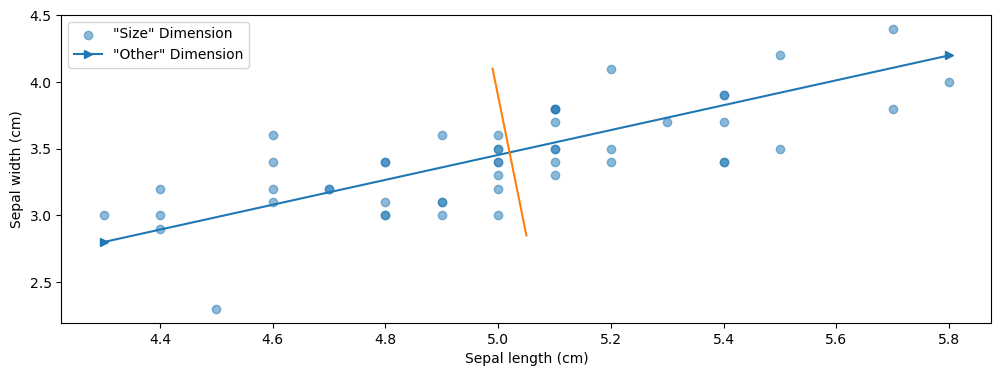

In [2]:
#import standard libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import seaborn as sns
pio.renderers.default = "iframe"
import matplotlib.pyplot as plt
%matplotlib inline


# Load the Iris dataset
iris = load_iris()

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Visualize the Iris flower dataset
setosa_flowers = (iris.target == 0)
plt.scatter(iris.data[setosa_flowers,0], iris.data[setosa_flowers,1], alpha=0.5)
plt.plot([4.3, 5.8], [2.8, 4.2], '->')
plt.plot([5.05, 4.99], [2.85, 4.1])
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.legend(['"Size" Dimension', '"Other" Dimension'])

How do we automatically identify natural directions of variation in the data? Consider the following dataset (image by [Andrew Ng](http://cs229.stanford.edu/)).

<center><img width=45% src="img/pca_projection_data.png"></center>

### Question 0:

Which of the following 2 lines can summarize the variance in a better way? A or B? Justify your answer shortly

A
<center><img width=50% src="img/pca_projection1.png"></center>

B
<center><img width=50% src="img/pca_projection2.png"></center>

_Type your answer here, replacing this text._

# Part 2: Applying PCA on the Iris dataset

To begin, run the following cell to (re)load the dataset into this notebook (if you haven't run the previous part). 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape `150 x 4`). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

In [3]:
#from sklearn.datasets import load_iris  #should be already loaded
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features. This should result in six total scatter plots in our scatter matrix with the classes labeled in distinct colors for each plot.

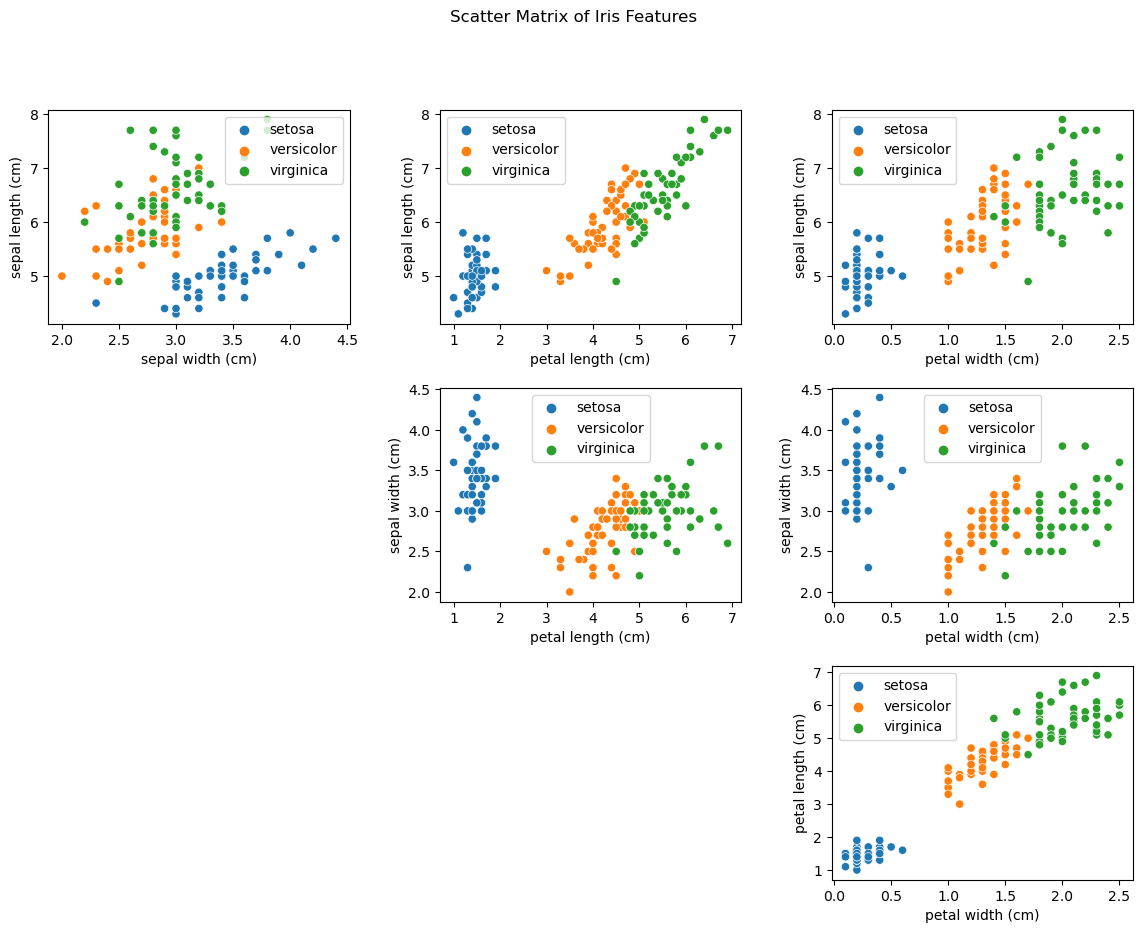

In [4]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(1, 4):
    for j in range(i):
        plt.subplot(3, 3, i+3*j)
        sns.scatterplot(x=iris_features[:, i], y=iris_features[:, j], hue=iris_target)
        plt.xlabel(iris_feature_names[i])
        plt.ylabel(iris_feature_names[j])

## Question 1a

To apply PCA, we will first need to center and scale the data so that the mean of each feature is 0, and the standard deviation of each feature is 1. 

Compute the columnwise mean of `iris_features` in the cell below and store it in `iris_mean`, and compute the columnwise standard deviation of `iris_features` and store it in `iris_std`. Each should be a numpy array of 4 means, 1 for each feature. Then, subtract `iris_mean` from `iris_features` and divide by `iris_std`, and finally, save the result in `features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `iris_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q1a
-->

In [ ]:
iris_mean = ...
iris_std = ...
iris_standardized = ...
iris_mean, iris_std

## Question 1b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of our `features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt`, respectively. Note that `vt` corresponds to $V^T$. Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q1b
-->

In [ ]:
u, s, vt = ...
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

## Question 1c

What can we learn from the singular values in `s`? Formally, we can measure the amount of variance captured by the i'th principal component as:

$\sigma_i^2/N$, where $\sigma_i$ is the singular value of the i'th principal component and $N$ is the total number of data points.

Compute the total variance of our data below by summing the square of each singular value in `s` and dividing the result by the total number of data points. Store the result in the variable `total_variance`.

<!--
BEGIN QUESTION
name: q1c
-->

In [ ]:
iris_total_variance = ...

print("iris_total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(iris_total_variance, np.sum(np.var(iris_standardized, axis=0))))

As you can see, `total_variance` is equal to the sum of the feature variances.

## Question 2a

Let's now use only the first two principal components to see what a 2D version of our iris data looks like.

First, construct the 2D version of the iris data by multiplying our `features` array with the first two right singular vectors in `v`. Because the first two right singular vectors are directions for the first two principal components, this will project the iris data down from a 4D subspace to a 2D subspace.

**Hints:**
* To matrix-multiply two numpy arrays, use `@` or `np.dot`.
* Note that the output of `np.linalg.svd` is `vt` and not `v`: the first two right singular vectors in `v` will be the first two columns of `v`, or the first two rows of `vt` (transposed to be column vectors instead of row vectors). 
* Since we want to obtain a 2D version of our iris dataset, the shape of `iris_2d` should be (150, 2).

<!--
BEGIN QUESTION
name: q2a
-->

In [ ]:
features.shape, vt.shape

In [ ]:
iris_2d = ...
iris_2d.shape

Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

In [ ]:
plt.figure(figsize = (9, 6))
plt.title("PC2 vs. PC1 for Iris Data", fontsize = 18)
plt.xlabel("Iris PC1", fontsize = 15)
plt.ylabel("Iris PC2", fontsize = 15)
sns.scatterplot(x = iris_2d[:, 0], y = iris_2d[:, 1], hue = iris_target);

## Question 2b

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three iris types?

<!--
BEGIN QUESTION
name: q2b
-->

_Type your answer here, replacing this text._

## Question 2c

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? Compute this quantity in the cell below by dividing the variance captured by the first two singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. Store the result in `two_dim_variance`.

<!--
BEGIN QUESTION
name: q2c
-->

In [ ]:
two_dim_variance = ...
two_dim_variance

Most of the variance in the data is explained by the two-dimensional projection!

## Question 3

As a last step, we will create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each principal component. In the cell below, create a scree plot by creating a line plot of the component scores (variance captured by each principal component) vs. the principal component number (1st, 2nd, 3rd, or 4th). Your graph should match the image below:

***Hint***: You may find `plt.xticks()` helpful when formatting your plot axes.

<img src="img/scree.png" width="400px" />

In [ ]:
#your plot goes here

<br/>

---

## [Tutorial] Biplots

Finally, we will analyze the **biplot** ([link](https://en.wikipedia.org/wiki/Biplot)) to understand how each feature contributes to the first two principal components. We do this by plotting the **directions**, or rows of $V^T$, which indicate how a feature correlates with each respective principal component. 

Recall that the columns of $U\Sigma$ are the principal components of $X$. Because $V^T$ is an orthonormal matrix:

\begin{eqnarray}
X &=& U\Sigma V^T \\
XV &=& U\Sigma V^T V = U\Sigma I\\
XV &=& U\Sigma
\end{eqnarray}


The direction vector $\vec{v}_1$ indicates the amount with which to scale each feature vector to construct the first principal component. For example, if we define the principal component as $(U\Sigma)_1 = \sigma_1\vec{u}_1$ and $\vec{v}_j$ as the $j$-th direction (and therefore the $j$-th row of $V^T$):

$$\begin{bmatrix}
| & & | \\
\vec{x}_1 & \cdots & \vec{x}_d \\
| & & | \\
\end{bmatrix} \begin{bmatrix}
| & | & \\
\vec{v}_1 & \vec{v}_2 & \cdots \\
| & | & \\
\end{bmatrix} =
\begin{bmatrix}
| & \\
\sigma_1\vec{u}_1 & \cdots  \\
| & \\
\end{bmatrix}
$$

**Note:** SVD decomposition is not unique. For example,  
\begin{eqnarray}
X &=& U\Sigma V^T \\
&=& (-U) \Sigma (-V)^T \\
&=& \tilde{U} \Sigma \tilde{U}^T \\
& \tilde{U} = -U, 
& \tilde{U} = -V
\end{eqnarray}

Here, $X = \tilde{U} \Sigma \tilde{V}^T$ is another valid SVD decomposition, and $\tilde{U} \Sigma$ is another valid principal component of X. The singular vectors $\tilde{U}$ have the opposite sign than $U$. We set the random seed here to ensure we can reproduce the same decomposition. 


Run the below cell to generate the biplot for the Iris dataset. Based on the principal components plotted in the above biplot, what can you say about how each feature contributes to PC1 and PC2?

In [ ]:
# Run this cell to plot a biplot; no further action is needed.
import random
random.seed(42)
cp = sns.color_palette()[1:] # Skip blue

plt.figure(figsize = (7, 7))

# First plot each datapoint in terms of the first two principal components.
sns.scatterplot(x = iris_2d[:, 0], y = iris_2d[:, 1]);

# Next, plot the loadings for PC1 and PC2.
dir1, dir2 = vt[0,:], vt[1,:]
# Just plotting the 2 arrows corresponding to 'sepal_width' and 'petal_length' 
for i, feature in enumerate(['', 'sepal width', 'petal length', '']):
    plt.arrow(0, 0,
              dir1[i], dir2[i],
              head_width=0.2, head_length=0.2, color=cp[i])
    plt.text(dir1[i] * 1+0.1*random.random(), # jitter
             dir2[i] * 1+0.1*random.random(), 
             feature, fontsize=18, color=cp[i],
             backgroundcolor=(1,1,1,0.6))

plt.title("Iris Biplot")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
plt.show()

## Question 4

Based on the principal components plotted in the above biplot, fill in the blanks for each of the following statements:

Q4a. `sepal width` looks to be ___________ with PC1.<br/>
Q4b. `sepal width` looks to be ___________ with PC2.<br/>
Q4c. `petal length` looks to be ___________ with PC1.<br/>
Q4d. `petal length` looks to be ___________ with PC2.

Note that we have displayed the arrows for all the features in the dataset, though you only need to look at the labeled arrows to answer the question (green - sepal width, red - petal length).

You should assign each variable (e.g., `q4a`) to`'A'`, `'B'`, `'C'` corresponding to the below:

A. positively correlated<br/>
B. negatively correlated <br/>
C. uncorrelated

In some cases, it may be difficult to draw the line between positively/negatively correlated and uncorrelated.

*Answers:*

q4a = ...
<br>
q4b = ...
<br>
q4c = ...
<br>
q4d = ...
<br>

# Part 3: PCA on 3D Data

**In Part 3, our goal is to see visually how PCA is simply the process of rotating the coordinate axes of our data.**

## Question 5

To get a better understanding of what PCA is doing to a dataset, let’s imagine applying it to points contained within this surfboard. If you are a surfer, shout aloud in class “I LOVE TO SURF” and you will get a free coffee for the next lecture. Offer is limited to the first three that opt for it.

<center>
<img src="img/surfboard.png" width="250px"/>
</center>

The origin is in the center of the board, and each point within the board has three attributes: how far (in cm) along the board’s length, width, and thickness the point is from the center. These three dimensions determine the spread of the data.
 
If we were to apply PCA to the surfboard, what would the first three principal components (PCs) represent? Feel free to draw and label these dimensions on the image of the surfboard.

Additional thought: Which of the 3 PCS should be used to create a 2D  representation of the surfboard? How come? Try to make a sketch of the 2D projection.

_Type your answer here, replacing this text._

The code below reads in a 3D dataset. We named the `DataFrame` `surfboard` because the data resembles a surfboard when plotted in 3D space. First, let's do a "thought" exercise.

In [ ]:
# Run this cell to see the plot; no further action is needed.
surfboard = pd.read_csv("data/data3d.csv")
surfboard.head(5)

### [Tutorial] Visualize the Data

The cell below will allow you to view the data as a 3D scatterplot. Rotate the data around and zoom in and out using your trackpad or the controls at the top right of the figure.

You should see that the data is an ellipsoid that looks roughly like a surfboard or a hashbrown patty ([link](https://www.google.com/search?q=hashbrown+patty&source=lnms&tbm=isch)). It is pretty long in one direction, pretty wide in another, and relatively thin along its third dimension. We can think of these as the "length", "width", and "thickness" of the surfboard data.

Observe that the surfboard is not aligned with the x/y/z axes.

If you get an error that your browser does not support webgl, you may need to restart your kernel and/or browser.

In [ ]:
# Run this cell to see the plot; no further action is needed.
fig = px.scatter_3d(surfboard, 
                    x='x', y='y', z='z', 
                    range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], height = 500, width = 600)
fig.show()

**Visualize the Data (Colorized)**

To give the figure a little more visual pop, the following cell does the same plot but assigns a pre-determined color value (that we've arbitrarily chosen) to each point. *These colors do not mean anything important*; they're simply there as a visual aid.

You might find using the `colorize_surfboard_data` method useful later in this lab.

In [ ]:
# Run this cell to see the colorized version of the previous cell; no further action is needed.
def colorize_surfboard_data(df):
    colors = pd.read_csv("data/surfboard_colors.csv", header = None).values
    df_copy = df.copy()
    df_copy.insert(loc = 3, column = "color", value = colors)
    return df_copy
    
fig = px.scatter_3d(colorize_surfboard_data(surfboard), 
                    x='x', y='y', z='z', 
                    range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], 
                    color = "color", color_continuous_scale = 'RdBu', height = 500, width = 600)
fig.show()

### Question 6a

In the previosu part, we standardized the Iris data before performing SVD, i.e., we made features zero-mean and unit-variance. In this part, we'll try just **centering** our data so that each feature is zero-mean and variance is unchanged.

Compute the column-wise mean of `surfboard` in the cell below and store the result in `surfboard_mean`. You can make `surfboard_mean` a `NumPy` array or a `Series`, whichever is more convenient. Regardless of your data type, `surfboard_mean` should have 3 means: 1 for each attribute, with the $x$ coordinate first, then $y$, then $z$.

Then, subtract `surfboard_mean` from `surfboard`, and save the result in `surfboard_centered`. The order of the columns in `surfboard_centered` should be $x$, then $y$, then $z$.

In [ ]:
# Compute the column-wise mean
surfboard_mean = ...

# Center the data by subtracting the mean
surfboard_centered = ...

# Display the first few rows of the centered data
surfboard_centered.head()

### Question 6b

In the following cell, compute the SVD of `surfboard_centered` as $U\Sigma V^T$, and store the left singular vectors $U$, singular values / diagonal elements of $\Sigma$, and (transposed) right singular vectors $V^T$ in `u2`, `s2`, and `vt2`, respectively.

Your code should be very similar to Question 1b.

In [ ]:
# Perform SVD
u2, s2, vt2 = ...

# Display results
u2, s2, vt2

### Question 6c: Total Variance

In Question 1c, we considered standardized features (each with unit variance), whose total variance was simply the count of features. Now, we'll show that the same relationship holds between singular values `s` and the variance of our (unstandardized) data.

In the cell below, compute the total variance as the sum of the squares of the singular values $\sigma_i$ divided by the number of datapoints $n$. Here's that formula again from previous questions:

$$\text{Var}(X) = \frac{\sum_{i=1}^p{\sigma_i^2}}{n} = \sum_{i=1}^p \frac{\sigma_i^2}{n}$$

In [ ]:
#Number of data points (rows in the dataset)
n = ...

# Compute total variance
total_variance_computed_from_singular_values = ...

# Display the result
total_variance_computed_from_singular_values

<br/>

Your `total_variance_computed_from_singular_values` result should be very close to the total variance of the original `surfboard` data:

In [ ]:
# Run this cell to check the result; no further action is needed.
np.var(surfboard, axis=0)

The total variance of our dataset is given by the sum of these numbers.

In [ ]:
# Run this cell to check the result; no further action is needed.
total_variance_computed_from_surfboard = sum(np.var(surfboard, axis=0))
total_variance_computed_from_surfboard

Note: The variances are the same for both `surfboard_centered` and `surfboard` (why?), so we show only one to avoid redundancy.

### Question 6d: Variance Explained by First Principal Component

In the cell below, set `variance_explained_by_1st_pc` to the proportion of the total variance explained by the 1st principal component. Your answer should be a number between 0 and 1.

In [ ]:
# Compute the variance explained by the first principal component
variance_explained_by_1st_pc = ...

# Display the result
variance_explained_by_1st_pc

We can also create a scree plot that shows the proportion of variance explained by all of our principal components, ordered from most to least. You already constructed a scree plot for the Iris data, so we'll leave the surfboard scree plot for you to do on your own time.

Instead, let's try to visualize why PCA is simply a rotation of the coordinate axes (i.e., features) of our data.

## Question 7: V as a Rotation Matrix

In the lecture, we saw that the first column of $XV$ contained the first principal component values for each observation, the second column of $XV$ contained the second principal component values for each observation, and so forth.

Let's name this matrix: $P = XV = U\Sigma$ is sometimes known as the "principal component matrix".

Compute the $P$ matrix for the surfboard dataset and store it in the variable `surfboard_pcs`.

**Hint:** What does $X$ represent here: `surfboard` or `surfboard_centered`? Why?

In [ ]:
# Compute the principal component matrix
surfboard_pcs = ...

# Display the first few rows
surfboard_pcs[:5]

### [Tutorial] Visualizing the Principal Component Matrix

We can think of $P$ as an output of the PCA procedure. $P$ is a **rotation** of the data such that the data will now appear "axis aligned". Specifically, for a 3d dataset, if we plot PC1, PC2, and PC3 along the $x$, $y$, and $z$ axes of our plot, then the greatest amount of variation happens along the $x$-axis, the second greatest amount along the $y$-axis, and the smallest amount along the $z$-axis. 

To visualize this, run the cell below, showing our data projected onto the principal component space. Compare it with your original figure, and observe that the data is precisely the same—only it is now rotated.

In [ ]:
# Run this cell to see the plot; no further action is needed.
# Convert NumPy array to Pandas DataFrame
surfboard_pcs = pd.DataFrame(surfboard_pcs, columns=["pc1", "pc2", "pc3"])

# Now the renaming step is unnecessary, but if needed, it would work:
# surfboard_pcs = surfboard_pcs.rename(columns={0: "pc1", 1: "pc2", 2: "pc3"})

# Plot the transformed data
fig = px.scatter_3d(colorize_surfboard_data(surfboard_pcs), 
                    x='pc1', y='pc2', z='pc3', 
                    range_x=[-10, 10], range_y=[-10, 10], range_z=[-10, 10], 
                    color='color', color_continuous_scale='RdBu', height=500, width=600)
fig.show()

We can also create a 2D scatter plot of our `surfboard` data. Note that the resulting is just the 3D plot as viewed from directly "overhead".

In [ ]:
# Run this cell to see the plot; no further action is needed.
fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

sns.scatterplot(data = colorize_surfboard_data(surfboard_pcs), 
                x = 'pc1', y = 'pc2', hue = "color", palette = "RdBu", legend = False)
plt.xlim(-10, 10);
plt.ylim(-10, 10);
plt.title("Top-Down View of $P$")
plt.show()

# Part 4: PCA on a real dataset

We are going to use data from different US states related to Murder, Assault, Rape and Urban Population and try do some PCA in order to discover some interesting perspectives about wild US. We will also use `sklearn`.

In [ ]:
#imports to come handy later
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv('data/USArrests.csv', index_col=0)
df.describe()

### Question 8

Compute the variance values for the 4 variables. What do you observe? 

Do we need scaling or not and why? If so include it in the code below.

In [ ]:
#your code goes here
#compute variance
var = ...

#scale the data if needed, store result to X
X = ...

_Type your answer here, replacing this text._

In [ ]:
# Fit the PCA model

# transform the data to get the principal components
# store the results to the following dataframes

#pca result on the data
#use pd.Dataframe(..., columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_pca = ...


#contributions of original variables to PCs
#use pd.Dataframe(..., index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings = ...

The plot below will run and give you the biplot. No further action is needed.

Pay attention that the variables `df_pca` and `pca_loadings` should be dataframes with the columns as shown in the comments of the code to work properly. Feel free to make modifications as needed.

In [ ]:
fig , ax1 = plt.subplots(figsize=(9,7))

#ax1.set_xlim(-3.5,3.5)
#ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_pca.index:
    ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [ ]:
#compute the pca explained_variance ratio and the cumulative explained variance ratio
#plot the scree plot

Finally, comment on how many PCs you would keep on this dataset.

_Type your answer here, replacing this text._